In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

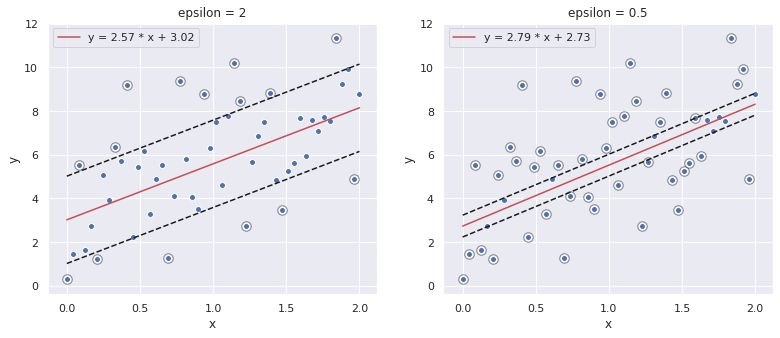

In [2]:
from sklearn.svm import LinearSVR

x_start, x_stop = (0, 2)
steps = 50

X = np.array(np.linspace(x_start, x_stop, steps)).reshape(-1, 1)
y = 3 * np.linspace(x_start, x_stop) + 3 + np.random.randn(steps) * 2

epsilons = [2, 0.5]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

for epsilon, ax in zip(epsilons, axes):
    svr = LinearSVR(epsilon=epsilon)
    svr.fit(X, y)

    t = np.linspace(x_start, x_stop, steps*2)

    y_pred = svr.coef_ * t + svr.intercept_
    y_pred_plus = y_pred + svr.epsilon
    y_pred_minus = y_pred - svr.epsilon

    points_plus = np.array([x for x in np.c_[X, y] if x[1] > svr.coef_ * x[0] + svr.intercept_ + svr.epsilon])
    points_minus = np.array([x for x in np.c_[X, y] if x[1] < svr.coef_ * x[0] + svr.intercept_ - svr.epsilon])

    ax.scatter(points_plus[:, 0], points_plus[:, 1], s=90, alpha=.5, ec='k', c='w')
    ax.scatter(points_minus[:, 0], points_minus[:, 1], s=90, alpha=.5, ec='k', c='w')
    ax.scatter(X, y, ec='w')
    ax.plot(t, y_pred, 'r', label=f'y = {svr.coef_[0]:.2f} * x + {svr.intercept_[0]:.2f}')
    ax.plot(t, y_pred_plus, 'k--')
    ax.plot(t, y_pred_minus, 'k--')
    ax.set_title(f'epsilon = {epsilon}')
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')

## Polynomian kernel

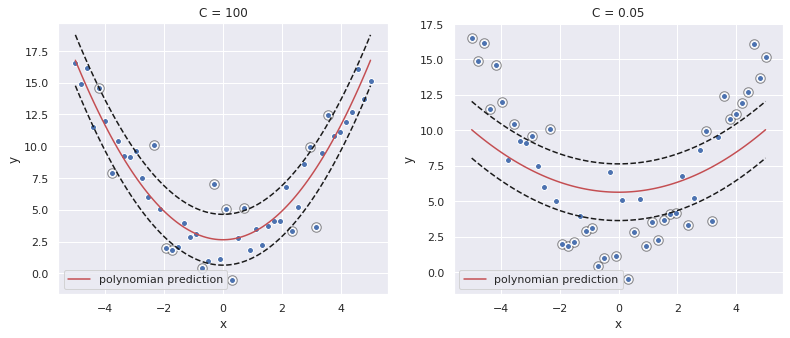

In [3]:
from sklearn.svm import SVR

x_start, x_stop = (-5, 5)
steps = 50

X = np.array(np.linspace(x_start, x_stop, steps)).reshape(-1, 1)
y = 0.5 * np.linspace(x_start, x_stop) ** 2 + 3 + np.random.randn(steps) * 2

hyperparameter_C = [100, 0.05]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

for C, ax in zip(hyperparameter_C, axes):
    svr = SVR(kernel="poly", degree=2, C=C, epsilon=2)
    svr.fit(X, y)

    t = np.array(np.linspace(x_start, x_stop, steps*2)).reshape(-1, 1)

    y_pred = svr.predict(t)
    y_pred_plus = y_pred + svr.epsilon
    y_pred_minus = y_pred - svr.epsilon

    points_plus = np.array([x for x in np.c_[X, y] if x[1] > svr.predict(x[0].reshape(-1, 1)) + svr.epsilon])
    points_minus = np.array([x for x in np.c_[X, y] if x[1] < svr.predict(x[0].reshape(-1, 1)) - svr.epsilon])

    ax.scatter(points_plus[:, 0], points_plus[:, 1], s=90, alpha=.5, ec='k', c='w')
    ax.scatter(points_minus[:, 0], points_minus[:, 1], s=90, alpha=.5, ec='k', c='w')
    ax.scatter(X, y, ec='w')
    ax.plot(t, y_pred, 'r', label=f'polynomian prediction')
    ax.plot(t, y_pred_plus, 'k--')
    ax.plot(t, y_pred_minus, 'k--')
    ax.set_title(f'C = {C}')
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')